<a href="https://colab.research.google.com/github/Arkaprabha1012/pythonopencv/blob/main/bonesupressionPartial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

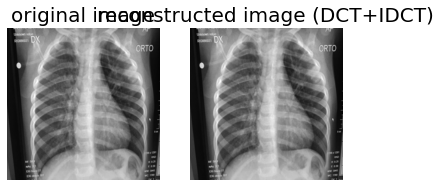

In [ ]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(imread('input.png')) 
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

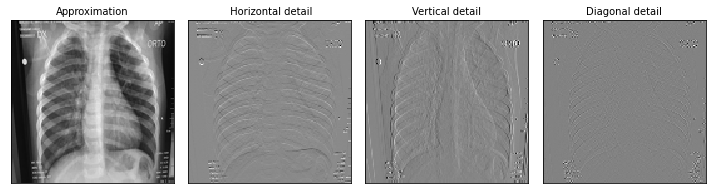

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import cv2
from PIL import Image

# Load image
original = cv2.imread("input.png",0)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(10, 3))
original1=original.resize((130,130))
#orig1=original1-LH
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

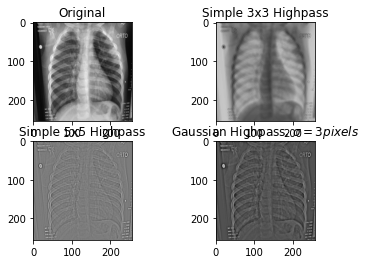

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = Image.open('input.png')
data = np.array(im, dtype=float)
plot(data, 'Original')

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  5, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plot(highpass_3x3, 'Simple 3x3 Highpass')

# A slightly "wider", but sill very simple highpass filter 
kernel = np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])
highpass_5x5 = ndimage.convolve(data, kernel)
plot(highpass_5x5, 'Simple 5x5 Highpass')

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plot(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')

plt.show()

In [ ]:
!unzip ML-BoneSuppression-master.zip

Archive:  ML-BoneSuppression-master.zip
0f9de5ff4cc1f793e27f9db52af35e631614a4c1
   creating: ML-BoneSuppression-master/
  inflating: ML-BoneSuppression-master/.DS_Store  
  inflating: ML-BoneSuppression-master/.gitignore  
  inflating: ML-BoneSuppression-master/LICENSE  
  inflating: ML-BoneSuppression-master/README.md  
   creating: ML-BoneSuppression-master/config/
  inflating: ML-BoneSuppression-master/config/data_preprocessing.cfg  
  inflating: ML-BoneSuppression-master/config/train.cfg  
  inflating: ML-BoneSuppression-master/description.png  
  inflating: ML-BoneSuppression-master/model.py  
   creating: ML-BoneSuppression-master/model/
  inflating: ML-BoneSuppression-master/model/model.data-00000-of-00001  
  inflating: ML-BoneSuppression-master/model/model.index  
  inflating: ML-BoneSuppression-master/model/model.meta  
 extracting: ML-BoneSuppression-master/output.png  
  inflating: ML-BoneSuppression-master/preprocessing.py  
  inflating: ML-BoneSuppression-master/requirem

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array

# x is noisy data and y is clean data
SIZE = 320

from tqdm import tqdm
noisy_data=[]
path1 = 'sandstone/noisy_images/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data.append(img_to_array(img))
    

clean_data=[]
path2 = 'sandstone/clean_images/'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.


#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()



model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)


print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

"""
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
plt.show()

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkaprabha1012","key":"22f1c94f5997407eeaf192b3911476d6"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d hmchuong/xray-bone-shadow-supression

100% 5.23G/5.23G [01:49<00:00, 32.6MB/s]
100% 5.23G/5.23G [01:49<00:00, 51.2MB/s]


In [9]:
!unzip xray-bone-shadow-supression.zip

Streaming output truncated to the last 5000 lines.
  inflating: augmented/augmented/source/8_136.png  
  inflating: augmented/augmented/source/8_137.png  
  inflating: augmented/augmented/source/8_138.png  
  inflating: augmented/augmented/source/8_139.png  
  inflating: augmented/augmented/source/8_14.png  
  inflating: augmented/augmented/source/8_140.png  
  inflating: augmented/augmented/source/8_141.png  
  inflating: augmented/augmented/source/8_142.png  
  inflating: augmented/augmented/source/8_143.png  
  inflating: augmented/augmented/source/8_144.png  
  inflating: augmented/augmented/source/8_145.png  
  inflating: augmented/augmented/source/8_146.png  
  inflating: augmented/augmented/source/8_147.png  
  inflating: augmented/augmented/source/8_148.png  
  inflating: augmented/augmented/source/8_149.png  
  inflating: augmented/augmented/source/8_15.png  
  inflating: augmented/augmented/source/8_150.png  
  inflating: augmented/augmented/source/8_151.png  
  inflating: au

100%|██████████| 4080/4080 [00:39<00:00, 104.60it/s]


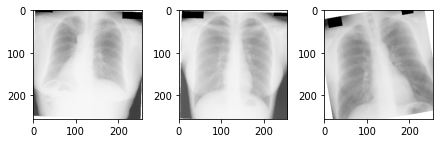

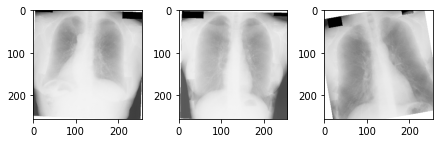

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 8)        

'\nplt.figure(figsize=(40, 4))\nfor i in range(10):\n    # display original\n    ax = plt.subplot(3, 20, i + 1)\n    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")\n    \n    # display reconstructed (after noise removed) image\n    ax = plt.subplot(3, 20, 40 +i+ 1)\n    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")\nplt.show()\n'

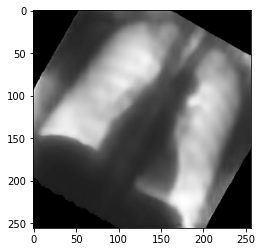

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array

# x is noisy data and y is clean data
SIZE = 256

from tqdm import tqdm
noisy_data=[]
path1 = 'augmented/augmented/source'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data.append(img_to_array(img))
    

clean_data=[]
path2 = 'augmented/augmented/target'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.


#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()



model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=100, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)


print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


model.save('Bonesupression_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

"""
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
plt.show()
"""

In [37]:
import cv2
import matplotlib.pyplot as plt
src.create(rows, cols, CV_8UC1);
src = imread('test.png', CV_8UC1);
#img=cv2.imread("test.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#edges=cv2.Laplacian(img,-1,ksize=1,delta=0,borderType=cv2.BORDER_DEFAULT)
edgex=cv2.Sobel(img,-1,dx=1,dy=0,ksize=1,delta=0,borderType=cv2.BORDER_DEFAULT)
edgey=cv2.Sobel(img,-1,dx=0,dy=1,ksize=1,delta=0,borderType=cv2.BORDER_DEFAULT)
edges=edgex+edgey
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2)
plt.xticks([])
plt.yticks([])

ModuleNotFoundError: ignored